In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [2]:
df = pd.read_csv(Path('JNorth_Other_Observ.csv'))
df.head()
df.dtypes

Unnamed: 0         int64
id                 int64
sighting_date     object
species           object
number             int64
latitude         float64
longitude        float64
flag_location      int64
comments          object
school            object
grade            float64
image_url         object
customerid         int64
number_old       float64
flag_number        int64
species_old       object
flag_species       int64
dtype: object

In [3]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df.head()
df.dtypes

Unnamed: 0         int64
id                 int64
sighting_date     object
species           object
number             int64
latitude         float64
longitude        float64
flag_location      int64
comments          object
school            object
grade            float64
image_url         object
customerid         int64
number_old       float64
flag_number        int64
species_old       object
flag_species       int64
year               int64
dtype: object

In [4]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,1603,916109073,1999-01-11,Monarch (OTHER Observations),1,28.807,-96.979,0,"We released 23 ""homegrown"" Monarch butterflies...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1
1,1606,917137615,1999-01-23,Monarch (OTHER Observations),1,28.807,-96.979,0,"Mid-coast of Texas, 23 Jan 99: Monarchs conti...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1
2,1607,917385333,1998-10-27,Monarch (OTHER Observations),1,36.164,-86.774,0,I am reporting the last Monarch which I saw in...,David lipscomb elementary school,-999999.999,-999999.999,1186,-999999.999,1,Monarch (OTHER observations),1,1998,10
3,1608,917674135,1999-01-30,Monarch (OTHER Observations),1,28.807,-96.979,0,Mid-coast of Tx: 1-30-99: We continue to have...,Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1
4,1614,918605036,1999-02-09,Monarch (OTHER Observations),1,29.770,-95.515,0,"Dear Journey North,In Houston, Texas, we have ...",Kinkaid school,8.000,-999999.999,1216,0.000,2,Monarch (OTHER observations),1,1999,2


In [5]:
# combining the year and month
df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month,month_and_year
0,1603,916109073,1999-01-11,Monarch (OTHER Observations),1,28.807,-96.979,0,"We released 23 ""homegrown"" Monarch butterflies...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1,1999-01-01
1,1606,917137615,1999-01-23,Monarch (OTHER Observations),1,28.807,-96.979,0,"Mid-coast of Texas, 23 Jan 99: Monarchs conti...",Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1,1999-01-01
2,1607,917385333,1998-10-27,Monarch (OTHER Observations),1,36.164,-86.774,0,I am reporting the last Monarch which I saw in...,David lipscomb elementary school,-999999.999,-999999.999,1186,-999999.999,1,Monarch (OTHER observations),1,1998,10,1998-10-01
3,1608,917674135,1999-01-30,Monarch (OTHER Observations),1,28.807,-96.979,0,Mid-coast of Tx: 1-30-99: We continue to have...,Victoria christian school,7.000,-999999.999,9704928,-999999.999,1,Monarch (OTHER observations),1,1999,1,1999-01-01
4,1614,918605036,1999-02-09,Monarch (OTHER Observations),1,29.770,-95.515,0,"Dear Journey North,In Houston, Texas, we have ...",Kinkaid school,8.000,-999999.999,1216,0.000,2,Monarch (OTHER observations),1,1999,2,1999-02-01


In [6]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month_and_year"]).count()
counts = counts.reset_index()
counts.head(200)

,month_and_year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,1998-10-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1998-12-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1999-01-01,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,1999-02-01,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,1999-03-01,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015-02-01,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
196,2015-03-01,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
197,2015-04-01,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
198,2015-05-01,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84


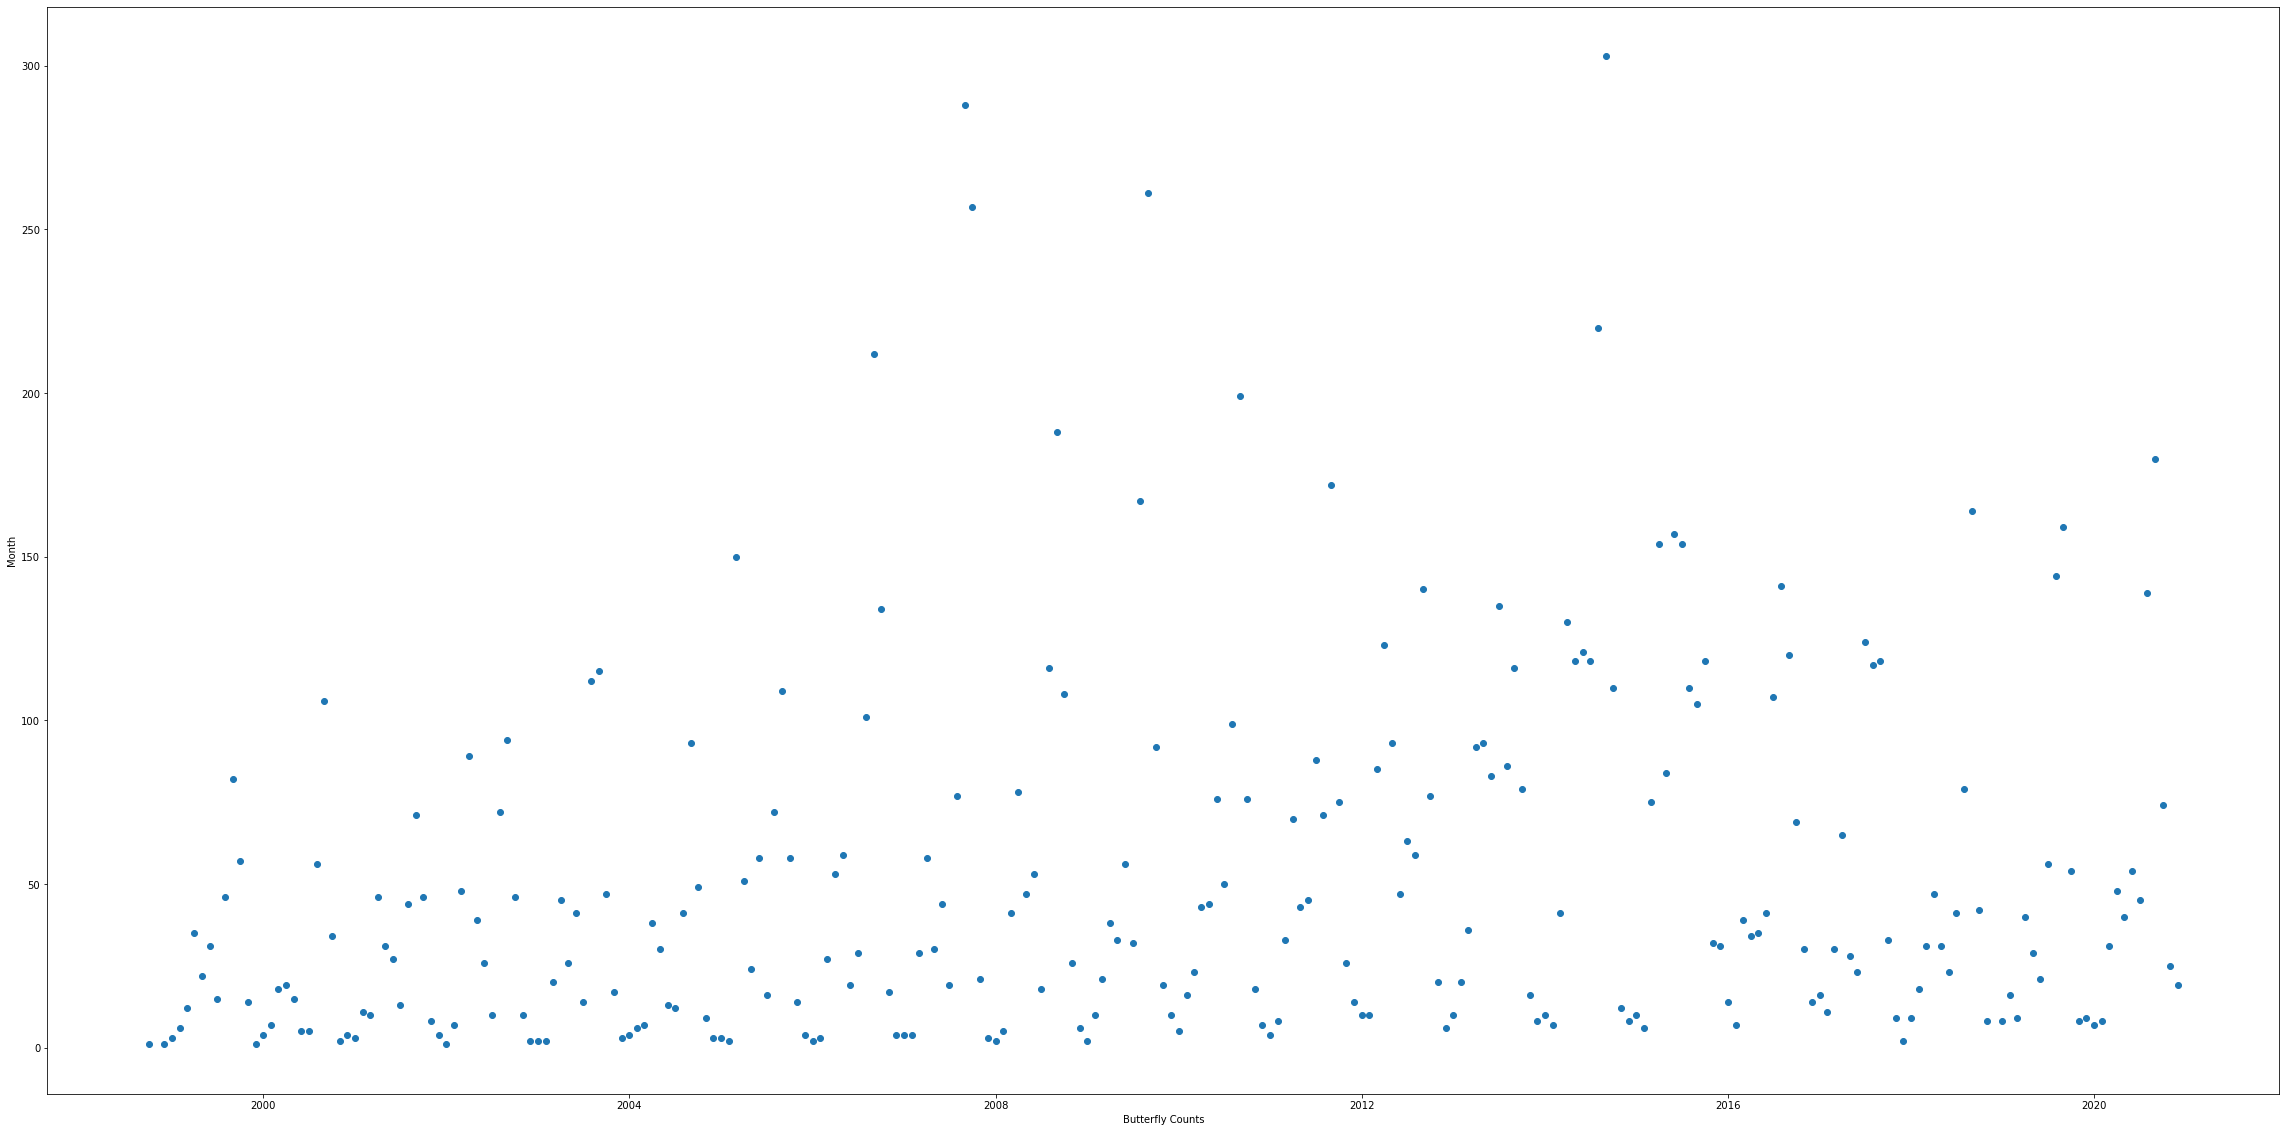

In [7]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(40, 20))
plt.scatter(counts.month_and_year, counts.sighting_date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')

plt.show()

In [8]:
# using reshape
counts["month_and_year"] = counts["month_and_year"].apply(lambda x: x.toordinal())
#counts["month_and_year"] = counts["month_and_year"].astype(float)
X = counts.month_and_year.values.reshape(-1, 1)


In [9]:
# setting the y axis as the count of dates
y = counts.sighting_date

In [10]:
# setting the model
model = LinearRegression()

In [11]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [12]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(265,)


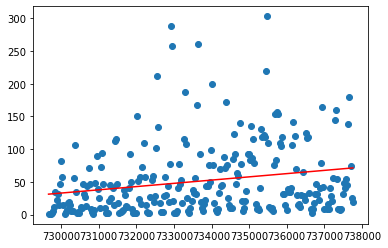

In [13]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (265, 3)


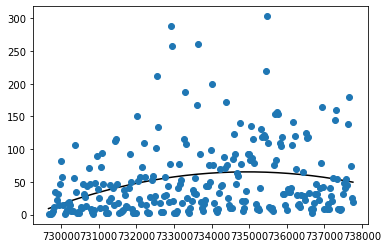

In [15]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (265, 4)


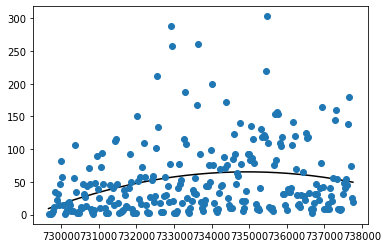

In [16]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (265, 5)


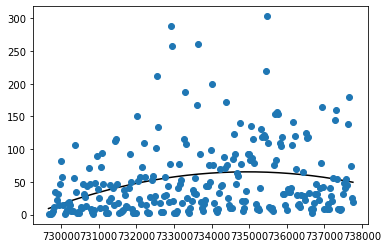

In [17]:
# 4th degree
fit_and_plot_poly_deg(4)